In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

In [2]:
data = pd.read_csv('/kaggle/input/global-economic-indicators-dataset-2010-2023/economic_indicators_dataset_2010_2023.csv')
data

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03
...,...,...,...,...,...,...,...
495,2023-08-31,Japan,5.71,-3.85,4.69,8.50,5968.07
496,2023-08-31,UK,4.82,8.95,10.91,8.87,21731.52
497,2023-09-30,USA,7.32,0.61,9.36,4.58,38924.38
498,2023-10-31,Germany,8.04,-2.23,2.89,8.04,39107.07


In [3]:
data_Brazil = data.loc[data['Country'] == 'Brazil']
data_France = data.loc[data['Country'] == 'France']
data_USA = data.loc[data['Country'] == 'USA']
data_Canada = data.loc[data['Country'] == 'Canada']
data_Japan = data.loc[data['Country'] == 'Japan']
data_Germany = data.loc[data['Country'] == 'Germany']
data_China = data.loc[data['Country'] == 'China']
data_UK = data.loc[data['Country'] == 'UK']
data_India = data.loc[data['Country'] == 'India']
data_Australia = data.loc[data['Country'] == 'Australia']

countries = [data_Brazil, data_France, data_USA, data_Canada, 
             data_Japan, data_Germany, data_China, data_UK, 
            data_India, data_Australia]

In [4]:
lags = [i for i in range(1, 5)]

for data in countries:
    for lag in lags:
        data[f'GDP Growth Rate (%) Lag_{lag}'] = data['GDP Growth Rate (%)'].shift(lag)
        data[f'Unemployment Rate (%) Lag_{lag}'] = data['Unemployment Rate (%)'].shift(lag)
        data[f'Interest Rate (%) Lag_{lag}'] = data['Interest Rate (%)'].shift(lag)
        data[f'Stock Index Value Lag_{lag}'] = data['Stock Index Value'].shift(lag)

/tmp/ipykernel_30/3155991358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'GDP Growth Rate (%) Lag_{lag}'] = data['GDP Growth Rate (%)'].shift(lag)
/tmp/ipykernel_30/3155991358.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Unemployment Rate (%) Lag_{lag}'] = data['Unemployment Rate (%)'].shift(lag)
/tmp/ipykernel_30/3155991358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [6]:
data = pd.concat([data_Brazil, data_France, data_USA, data_Canada, data_Japan, data_Germany, data_China, 
                 data_UK, data_India, data_Australia])

In [7]:
data

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value,GDP Growth Rate (%) Lag_1,Unemployment Rate (%) Lag_1,Interest Rate (%) Lag_1,...,Interest Rate (%) Lag_2,Stock Index Value Lag_2,GDP Growth Rate (%) Lag_3,Unemployment Rate (%) Lag_3,Interest Rate (%) Lag_3,Stock Index Value Lag_3,GDP Growth Rate (%) Lag_4,Unemployment Rate (%) Lag_4,Interest Rate (%) Lag_4,Stock Index Value Lag_4
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58,0.69,10.48,7.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2010-10-31,Brazil,8.57,5.37,7.67,0.68,29564.14,0.31,8.26,6.09,...,7.71,21748.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2010-11-30,Brazil,9.81,2.15,4.68,6.04,10652.89,5.37,7.67,0.68,...,6.09,23304.58,0.69,10.48,7.71,21748.85,NaN,NaN,NaN,NaN
39,2011-03-31,Brazil,3.34,4.03,3.08,1.38,33746.73,2.15,4.68,6.04,...,0.68,29564.14,0.31,8.26,6.09,23304.58,0.69,10.48,7.71,21748.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2023-03-31,Australia,6.47,3.24,10.53,1.64,8289.66,-2.69,10.66,7.60,...,9.24,32916.41,8.59,9.49,0.24,37095.37,7.24,9.92,2.08,8973.18
470,2023-04-30,Australia,8.46,8.17,4.26,5.04,32104.35,3.24,10.53,1.64,...,7.60,33233.04,-2.15,10.20,9.24,32916.41,8.59,9.49,0.24,37095.37
477,2023-05-31,Australia,2.36,2.27,7.50,8.68,13090.00,8.17,4.26,5.04,...,1.64,8289.66,-2.69,10.66,7.60,33233.04,-2.15,10.20,9.24,32916.41
488,2023-07-31,Australia,1.96,4.78,2.94,3.95,24158.30,2.27,7.50,8.68,...,5.04,32104.35,3.24,10.53,1.64,8289.66,-2.69,10.66,7.60,33233.04


In [8]:
data = data.sort_index()
data

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value,GDP Growth Rate (%) Lag_1,Unemployment Rate (%) Lag_1,Interest Rate (%) Lag_1,...,Interest Rate (%) Lag_2,Stock Index Value Lag_2,GDP Growth Rate (%) Lag_3,Unemployment Rate (%) Lag_3,Interest Rate (%) Lag_3,Stock Index Value Lag_3,GDP Growth Rate (%) Lag_4,Unemployment Rate (%) Lag_4,Interest Rate (%) Lag_4,Stock Index Value Lag_4
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58,0.69,10.48,7.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2023-08-31,Japan,5.71,-3.85,4.69,8.50,5968.07,7.00,6.18,9.31,...,8.86,17062.72,8.71,4.76,5.51,3764.77,3.77,2.29,2.45,10859.73
496,2023-08-31,UK,4.82,8.95,10.91,8.87,21731.52,4.21,8.76,9.44,...,0.89,39000.52,1.02,10.97,6.94,35712.22,1.08,9.28,7.89,13727.20
497,2023-09-30,USA,7.32,0.61,9.36,4.58,38924.38,-2.75,7.45,2.22,...,0.09,17221.81,1.73,5.11,-0.51,33166.73,4.25,5.88,1.40,14846.60
498,2023-10-31,Germany,8.04,-2.23,2.89,8.04,39107.07,-2.39,7.50,3.45,...,4.63,29343.22,0.00,9.40,8.98,4008.66,9.14,6.73,4.04,35092.66


In [9]:
data = data.drop('Date', axis=1)
categorical_columns = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=categorical_columns)

In [10]:
data

,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value,GDP Growth Rate (%) Lag_1,Unemployment Rate (%) Lag_1,Interest Rate (%) Lag_1,Stock Index Value Lag_1,GDP Growth Rate (%) Lag_2,...,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Japan,Country_UK,Country_USA
0,1.23,0.69,10.48,7.71,21748.85,NaN,NaN,NaN,NaN,NaN,...,False,True,False,False,False,False,False,False,False,False
1,6.76,2.59,4.27,7.39,10039.56,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,False
2,7.46,4.84,2.64,6.39,13129.10,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
3,5.43,0.31,8.26,6.09,23304.58,0.69,10.48,7.71,21748.85,NaN,...,False,True,False,False,False,False,False,False,False,False
4,0.69,-0.52,11.92,-0.51,16413.03,NaN,NaN,NaN,NaN,NaN,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5.71,-3.85,4.69,8.50,5968.07,7.00,6.18,9.31,18554.54,-1.27,...,False,False,False,False,False,False,False,True,False,False
496,4.82,8.95,10.91,8.87,21731.52,4.21,8.76,9.44,9654.12,0.93,...,False,False,False,False,False,False,False,False,True,False
497,7.32,0.61,9.36,4.58,38924.38,-2.75,7.45,2.22,22982.74,4.60,...,False,False,False,False,False,False,False,False,False,True
498,8.04,-2.23,2.89,8.04,39107.07,-2.39,7.50,3.45,2272.10,8.26,...,False,False,False,False,False,True,False,False,False,False


In [11]:
y = data['Inflation Rate (%)']
X = data.drop('Inflation Rate (%)', axis=1)

In [12]:
test_size = 50
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, shuffle=False
)

In [13]:
cat = CatBoostRegressor(iterations=350, depth=10, rsm=0.2, random_state=42)
cat.fit(X_train, y_train, verbose=50)

Learning rate set to 0.084734
0:	learn: 2.9112676	total: 67.4ms	remaining: 23.5s
50:	learn: 1.5114572	total: 461ms	remaining: 2.7s
100:	learn: 0.7928255	total: 842ms	remaining: 2.08s
150:	learn: 0.4118051	total: 1.23s	remaining: 1.62s
200:	learn: 0.2056884	total: 1.65s	remaining: 1.22s
250:	learn: 0.1048925	total: 2.04s	remaining: 803ms
300:	learn: 0.0555674	total: 2.43s	remaining: 396ms
349:	learn: 0.0292132	total: 2.84s	remaining: 0us


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

In [15]:
preds = cat.predict(X_test)
print(mean_absolute_error(y_test, preds))
r2_score(y_test, preds)

2.486065619382577


-0.059735690599219016

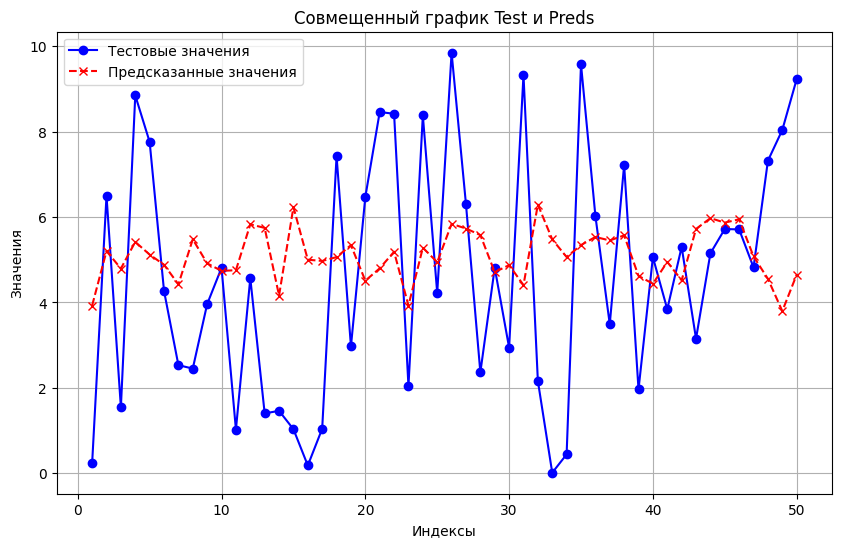

In [16]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1, 51)], y_test ,label='Тестовые значения', marker='o', linestyle='-', color='blue')
plt.plot([i for i in range(1, 51)], preds, label='Предсказанные значения', marker='x', linestyle='--', color='red')

# Оформление графика
plt.title('Совмещенный график Test и Preds')
plt.xlabel('Индексы')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from xgboost import XGBRegressor

In [18]:
xgb = XGBRegressor(n_estimators=1000, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [19]:
xgb_preds = xgb.predict(X_test)

In [20]:
print(mean_absolute_error(y_test, xgb_preds))
r2_score(y_test, xgb_preds)

2.7691512651443473


-0.3592455144310567

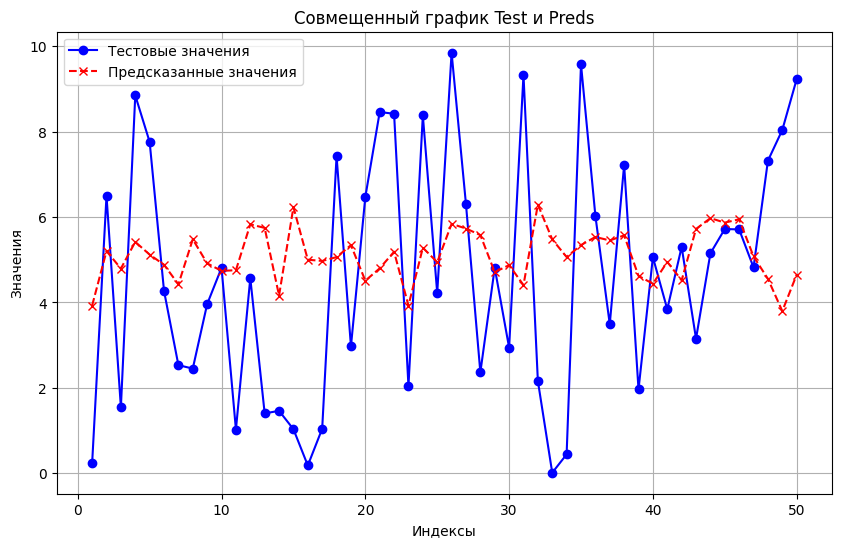

In [21]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1, 51)], y_test ,label='Тестовые значения', marker='o', linestyle='-', color='blue')
plt.plot([i for i in range(1, 51)], preds, label='Предсказанные значения', marker='x', linestyle='--', color='red')

# Оформление графика
plt.title('Совмещенный график Test и Preds')
plt.xlabel('Индексы')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
X = pd.concat([X, pd.Series(xgb.predict(X)), pd.Series(cat.predict(X))], axis=1)

In [23]:
X

,GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value,GDP Growth Rate (%) Lag_1,Unemployment Rate (%) Lag_1,Interest Rate (%) Lag_1,Stock Index Value Lag_1,GDP Growth Rate (%) Lag_2,Unemployment Rate (%) Lag_2,...,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Japan,Country_UK,Country_USA,0,1
0,0.69,10.48,7.71,21748.85,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,1.235058,1.367214
1,2.59,4.27,7.39,10039.56,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,True,False,False,False,False,False,6.758243,6.745793
2,4.84,2.64,6.39,13129.10,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,7.461296,7.479689
3,0.31,8.26,6.09,23304.58,0.69,10.48,7.71,21748.85,NaN,NaN,...,False,False,False,False,False,False,False,False,5.430317,5.447125
4,-0.52,11.92,-0.51,16413.03,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,0.686890,0.653463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-3.85,4.69,8.50,5968.07,7.00,6.18,9.31,18554.54,-1.27,9.89,...,False,False,False,False,False,True,False,False,6.287746,5.946884
496,8.95,10.91,8.87,21731.52,4.21,8.76,9.44,9654.12,0.93,4.58,...,False,False,False,False,False,False,True,False,3.541894,5.077496
497,0.61,9.36,4.58,38924.38,-2.75,7.45,2.22,22982.74,4.60,4.17,...,False,False,False,False,False,False,False,True,4.623408,4.552077
498,-2.23,2.89,8.04,39107.07,-2.39,7.50,3.45,2272.10,8.26,3.94,...,False,False,False,True,False,False,False,False,4.007931,3.796917


In [24]:
test_size = 50
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, shuffle=False
)

In [25]:
meta_cat = CatBoostRegressor(iterations=450, random_state=42)
meta_cat.fit(X_train, y_train)

Learning rate set to 0.069076
0:	learn: 2.7963634	total: 5.57ms	remaining: 2.5s
1:	learn: 2.6438138	total: 9.54ms	remaining: 2.14s
2:	learn: 2.5087786	total: 13.3ms	remaining: 1.98s
3:	learn: 2.3776580	total: 17.2ms	remaining: 1.91s
4:	learn: 2.2623388	total: 20.8ms	remaining: 1.85s
5:	learn: 2.1493336	total: 24.4ms	remaining: 1.81s
6:	learn: 2.0548349	total: 28ms	remaining: 1.77s
7:	learn: 1.9511716	total: 31.7ms	remaining: 1.75s
8:	learn: 1.8468584	total: 35.5ms	remaining: 1.74s
9:	learn: 1.7518995	total: 39.3ms	remaining: 1.73s
10:	learn: 1.6535836	total: 42.9ms	remaining: 1.71s
11:	learn: 1.5689306	total: 48.2ms	remaining: 1.76s
12:	learn: 1.4983605	total: 53.1ms	remaining: 1.78s
13:	learn: 1.4225069	total: 58.2ms	remaining: 1.81s
14:	learn: 1.3471028	total: 62.8ms	remaining: 1.82s
15:	learn: 1.2785757	total: 67.7ms	remaining: 1.83s
16:	learn: 1.2248146	total: 73.4ms	remaining: 1.87s
17:	learn: 1.1624746	total: 77ms	remaining: 1.85s
18:	learn: 1.0982971	total: 80.8ms	remaining: 1.8

In [26]:
preds = meta_cat.predict(X_test)

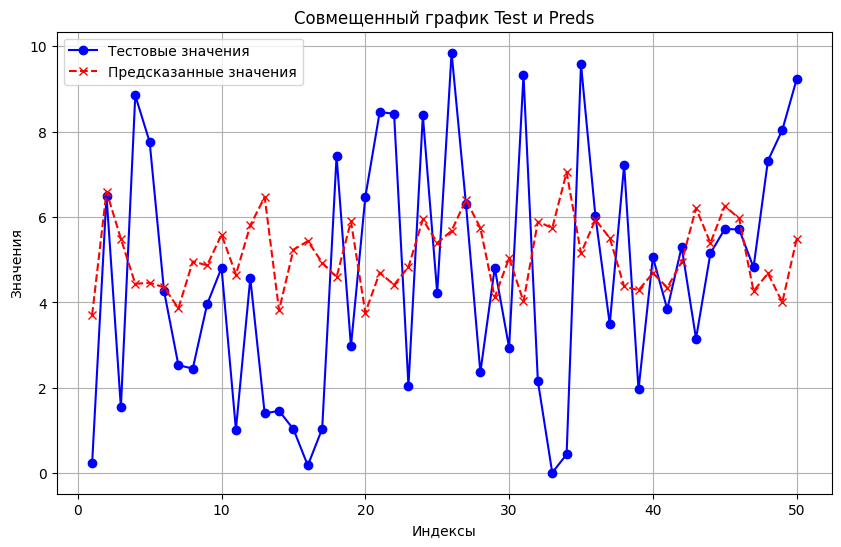

In [27]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1, 51)], y_test ,label='Тестовые значения', marker='o', linestyle='-', color='blue')
plt.plot([i for i in range(1, 51)], preds, label='Предсказанные значения', marker='x', linestyle='--', color='red')

# Оформление графика
plt.title('Совмещенный график Test и Preds')
plt.xlabel('Индексы')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
test_size = 50
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, shuffle=False
)

In [29]:
xgb_model = XGBRegressor(n_estimators=200)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
xgb_preds = xgb_model.predict(X_test)

In [31]:
error = y_test - xgb_preds

In [32]:
cat_model = CatBoostRegressor(iterations=50)
cat_model.fit(X_test, error)

Learning rate set to 0.291309
0:	learn: 3.0142598	total: 1.89ms	remaining: 92.8ms
1:	learn: 2.7969606	total: 3.06ms	remaining: 73.5ms
2:	learn: 2.5820391	total: 4.05ms	remaining: 63.4ms
3:	learn: 2.4322521	total: 5.09ms	remaining: 58.6ms
4:	learn: 2.2732540	total: 6.25ms	remaining: 56.3ms
5:	learn: 2.0479839	total: 7.12ms	remaining: 52.2ms
6:	learn: 1.8728400	total: 7.95ms	remaining: 48.8ms
7:	learn: 1.7534862	total: 8.75ms	remaining: 45.9ms
8:	learn: 1.6377761	total: 9.53ms	remaining: 43.4ms
9:	learn: 1.5094261	total: 10.3ms	remaining: 41.2ms
10:	learn: 1.3892519	total: 11.1ms	remaining: 39.2ms
11:	learn: 1.2856220	total: 11.9ms	remaining: 37.6ms
12:	learn: 1.1812827	total: 12.6ms	remaining: 36ms
13:	learn: 1.1162544	total: 13.5ms	remaining: 34.6ms
14:	learn: 1.0293922	total: 14.3ms	remaining: 33.5ms
15:	learn: 0.9494547	total: 15.1ms	remaining: 32.1ms
16:	learn: 0.8691293	total: 15.9ms	remaining: 30.8ms
17:	learn: 0.8064526	total: 16.6ms	remaining: 29.5ms
18:	learn: 0.7520384	total: 

In [33]:
cat_preds = cat_model.predict(X_test)
preds = xgb_preds + cat_preds

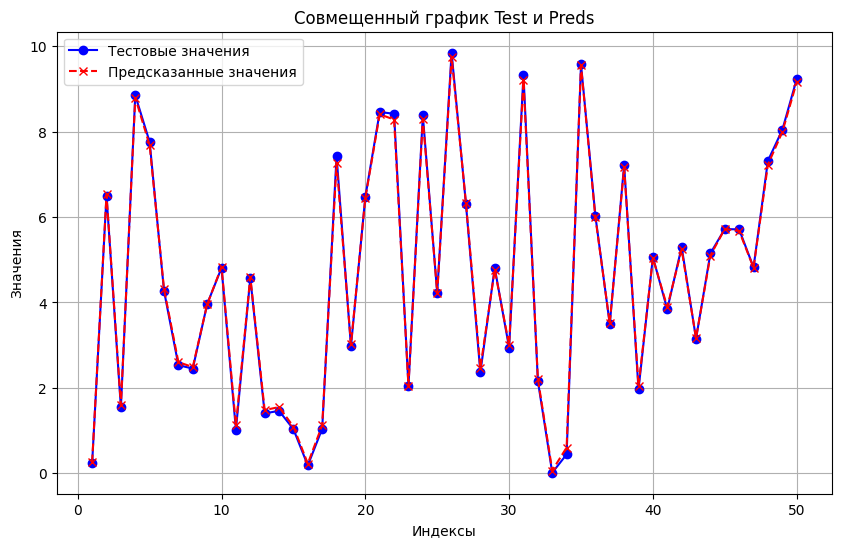

In [34]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1, 51)], y_test ,label='Тестовые значения', marker='o', linestyle='-', color='blue')
plt.plot([i for i in range(1, 51)], preds, label='Предсказанные значения', marker='x', linestyle='--', color='red')

# Оформление графика
plt.title('Совмещенный график Test и Preds')
plt.xlabel('Индексы')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
test_size = 50
X, X_final, y, y_final = train_test_split(
    X, y, test_size=test_size, shuffle=False
)

In [36]:
test_size = 150
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, shuffle=False
)

In [37]:
xgb_model = XGBRegressor(n_estimators=250)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
error = y_test - xgb_preds
cat_model = CatBoostRegressor(iterations=150)
cat_model.fit(X_test, error)

Learning rate set to 0.141853
0:	learn: 0.0626221	total: 2.1ms	remaining: 314ms
1:	learn: 0.0614109	total: 4.07ms	remaining: 301ms
2:	learn: 0.0601833	total: 6.21ms	remaining: 304ms
3:	learn: 0.0584928	total: 8.19ms	remaining: 299ms
4:	learn: 0.0570403	total: 9.98ms	remaining: 290ms
5:	learn: 0.0558640	total: 11.9ms	remaining: 286ms
6:	learn: 0.0549726	total: 13.7ms	remaining: 279ms
7:	learn: 0.0538101	total: 15.4ms	remaining: 274ms
8:	learn: 0.0531958	total: 17.2ms	remaining: 269ms
9:	learn: 0.0522160	total: 18.9ms	remaining: 265ms
10:	learn: 0.0510701	total: 21.2ms	remaining: 268ms
11:	learn: 0.0504279	total: 22.5ms	remaining: 259ms
12:	learn: 0.0496323	total: 24.4ms	remaining: 257ms
13:	learn: 0.0485289	total: 26.3ms	remaining: 255ms
14:	learn: 0.0473210	total: 28.1ms	remaining: 253ms
15:	learn: 0.0466278	total: 29.9ms	remaining: 250ms
16:	learn: 0.0457669	total: 31.8ms	remaining: 248ms
17:	learn: 0.0448903	total: 33.6ms	remaining: 246ms
18:	learn: 0.0441710	total: 35.3ms	remaining:

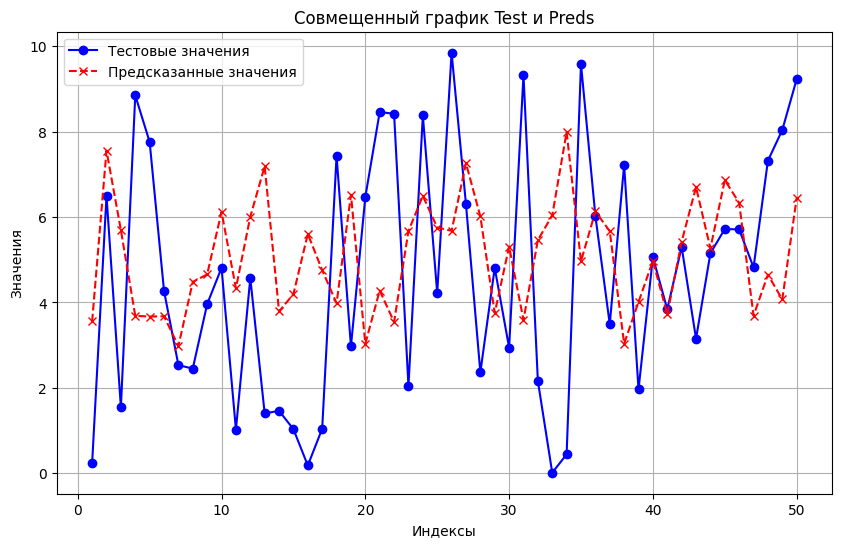

In [38]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1, 51)], y_final ,label='Тестовые значения', marker='o', linestyle='-', color='blue')
plt.plot([i for i in range(1, 51)], (cat_model.predict(X_final) + xgb_model.predict(X_final)), label='Предсказанные значения', marker='x', linestyle='--', color='red')

# Оформление графика
plt.title('Совмещенный график Test и Preds')
plt.xlabel('Индексы')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
mean_absolute_error(y_final, (cat_model.predict(X_final) + xgb_model.predict(X_final)))

2.7775668107864715

# Мировая инфляция: СВО или богатство